In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import networkx as nx
import itertools
import csv

In [2]:
# 抽出した固有名詞とその出現頻度を調査し、2次元配列に入れる（降順ソート込み）関数
def calc_word_freq(word_list_all):
    return_list = []
    word_rank = []
    
    count_dict = collections.Counter(word_list_all)
    #print(count_dict)
    
    for k, v in count_dict.items():
        word_rank.append([k, v])

    word_rank.sort(key=lambda x:(x[1],x[0]))
    return_list = word_rank.reverse()
    return word_rank

In [3]:
# 2次元の配列をフラットにする関数
def word_rank_sort(kiji_list):

    kiji_cont = []

    for kiji in kiji_list :
        kiji_cont.extend(kiji)

    word_rank = calc_word_freq(kiji_cont)

    return word_rank

In [4]:
# 共起ネットワーク図を作成する関数
# 引数
# kiji_list :  曲ごとの参加アイドルの配列
# output_rank : アイドルの内、出現頻度が高い順に上からこの値の数までグラフに表示する(未使用)
# del_weight : エッジについて、この値以下の重みは削除する(グラフに表示しない)
def word_network_gen(kiji_list, output_rank, del_weight):

    G = nx.Graph()
    #G.add_nodes_from([(word[0], {"count":word[1]}) for word in word_rank_sort(kiji_list)[:output_rank]])
    G.add_nodes_from([(word[0], {"count":word[1]}) for word in word_rank_sort(kiji_list)])
    
    node_comb = []
    for words in kiji_list:
        for node0,node1 in itertools.combinations(words, 2):
            if not G.has_node(node0) or not G.has_node(node1):
                continue
            if G.has_edge(node0, node1):
                G.edge[node0][node1]["weight"] += 1
            else:
                G.add_edge(node0, node1, {"weight":1})
                node_comb.append([node0,node1])

    for (u,v,d) in G.edges(data=True):
        if d["weight"] <= del_weight:
            G.remove_edge(u, v)

    plt.figure(figsize=(15,15)).patch.set_facecolor('white') # 背景は白
    pos = nx.spring_layout(G, k=0.3)

    node_size = [ d['count']*20 for (n,d) in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='w',alpha=0.6, node_size=node_size)
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family="IPAGothic", font_weight="bold")

    edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='c', width=edge_width)

    plt.axis('off')
    plt.savefig("./data/out_deresute_network.png")
    plt.show()

    return G, node_comb

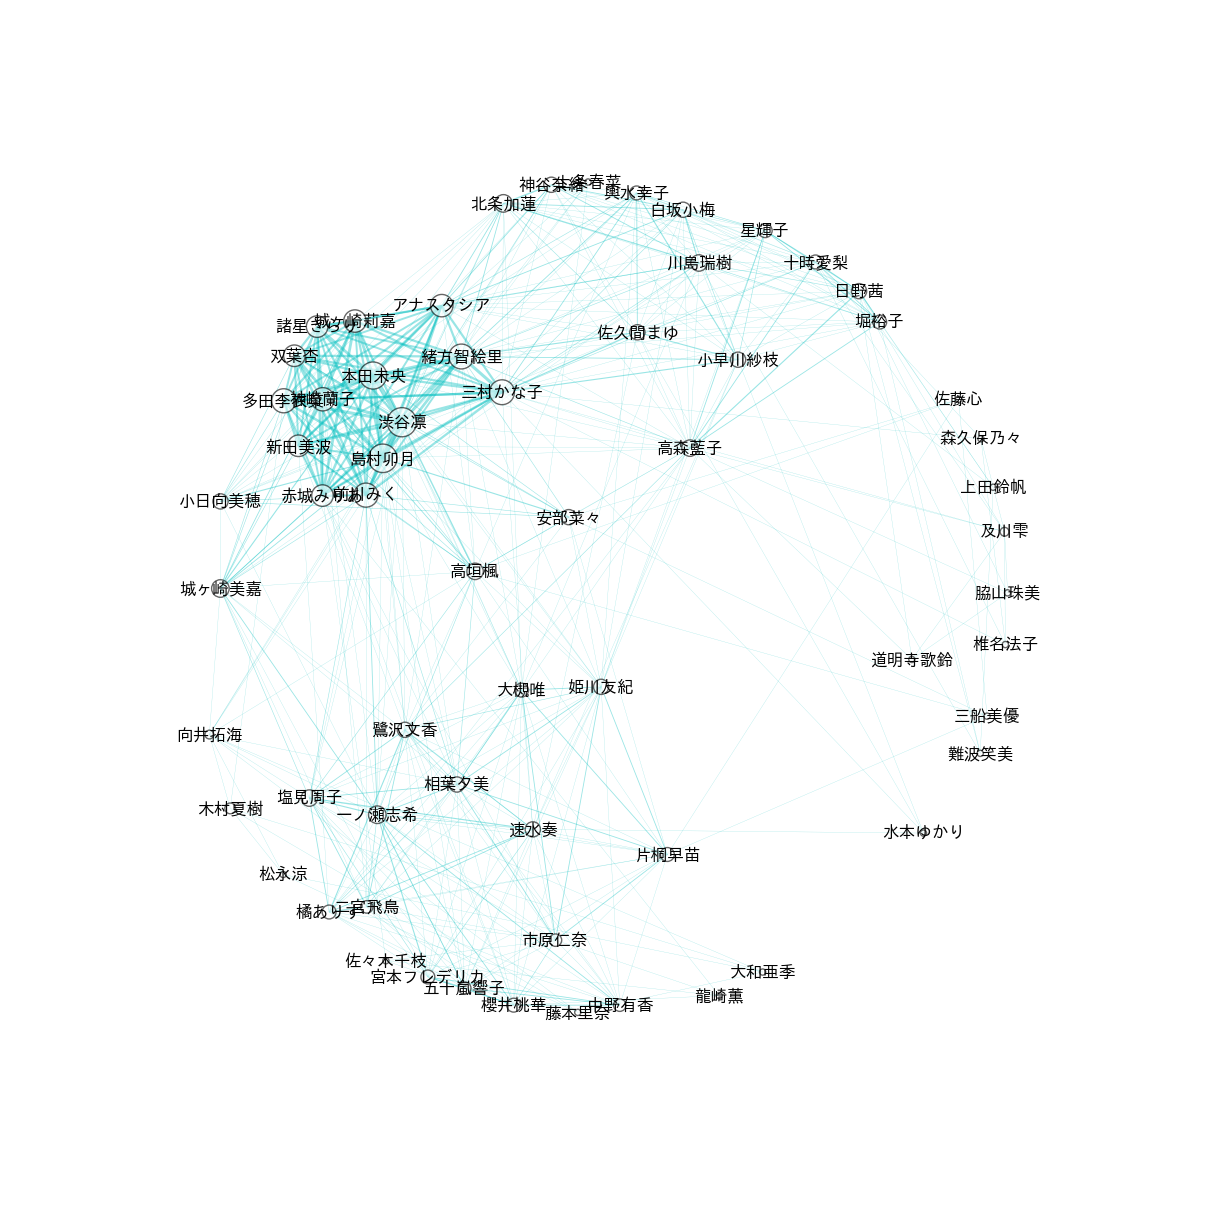

In [5]:
# 曲＋参加アイドルのcsvファイルを読み込み
f = open('./data/deresute_member.csv', 'r')
readdata = csv.reader(f)
G = nx.Graph()

kiji_list = []
for tmp in readdata:
    kiji_list.append(tmp)

# 共起ネットワーク作成
G, node_comb = word_network_gen(kiji_list, 50, 0)

In [6]:
# 参加楽曲数、リンク数(=共演者数)、媒介中心性、次数中心性のランキング表示
value = list(G.degree().values())
stat_list = []
for i, node in enumerate(G.node):
    for word in word_rank_sort(kiji_list):
        if(node == word[0]):
            count = word[1]
    stat_list.append([node, count, nx.degree(G)[node], nx.betweenness_centrality(G)[node], nx.degree_centrality(G)[node]])

stat_list = sorted(stat_list, key=lambda x:x[1], reverse=True)

df_stat_list = pd.DataFrame(stat_list)
df_stat_list.columns = ["メンバー", "参加楽曲数", "リンク数","媒介中心性","次数中心性"]

# csvにダンプ
df_stat_list.to_csv("./data/out_deresute_network_ana.csv")

# 表示
df_stat_list

,メンバー,参加楽曲数,リンク数,媒介中心性,次数中心性
0,渋谷凛,22,29,0.043669,0.467742
1,島村卯月,21,29,0.045548,0.467742
2,本田未央,19,24,0.016615,0.387097
3,三村かな子,16,32,0.106803,0.516129
4,緒方智絵里,16,31,0.043115,0.500000
5,前川みく,15,24,0.037228,0.387097
6,多田李衣菜,15,19,0.032857,0.306452
7,神崎蘭子,14,19,0.006820,0.306452
8,アナスタシア,13,26,0.025432,0.419355
9,城ヶ崎莉嘉,13,18,0.004473,0.290323


In [7]:
# 共演したアイドルの組み合わせと共演回数を表示
comb_list = []
for node in node_comb:
    comb_list.append([node[0], node[1], G.edge[node[0]][node[1]]['weight']])

comb_list = sorted(comb_list, key=lambda x:x[2], reverse=True)
    
df_comb_list = pd.DataFrame(comb_list)
df_comb_list.columns = ["メンバー1", "メンバー2", "共演回数"]

# csvにダンプ
df_comb_list.to_csv("./data/out_deresute_kyouen.csv")

# 表示
df_comb_list

,メンバー1,メンバー2,共演回数
0,島村卯月,渋谷凛,17
1,島村卯月,本田未央,16
2,渋谷凛,本田未央,16
3,渋谷凛,多田李衣菜,11
4,渋谷凛,神崎蘭子,11
5,三村かな子,緒方智絵里,11
6,多田李衣菜,神崎蘭子,10
7,本田未央,城ヶ崎莉嘉,10
8,島村卯月,双葉杏,10
9,本田未央,諸星きらり,10
